# 人工神經網路程式碼方面快速入門：

(聲明：以下內容都是在網路上整理並修改的，真正我原創的內容並不多，我主要只是搬運工)
<br>
  <a href="https://colab.research.google.com/drive/1TxMEnVL0m07ArIShp5_EnHGTvWs8tpNV?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<br>

## 0.mnist 資料集探索：

In [ ]:
## 這段代碼做的事情是從MNIST數據集中提取一個數字的圖像，然後使用ASCII字符來視覺化它。最後，它還會打印出該數字的真實標籤。
from keras.datasets import mnist # 導入Keras庫中的MNIST數據集
import numpy as np # 導入NumPy庫，用於數組操作
# 從MNIST數據集中加載訓練和測試數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()
'''
使用 Keras 的 mnist.load_data() 函數從 MNIST 數據集中加載數據。這個函數會返回兩個元組，每個元組都包含一組圖像和相應的標籤。

X_train 和 y_train：這是用於訓練模型的數據。X_train 包含 60,000 張 28x28 大小的手寫數字圖像，而 y_train 包含這些圖像對應的標籤（0 到 9）。

X_test 和 y_test：這是用於測試模型的數據。X_test 包含 10,000 張 28x28 大小的手寫數字圖像，而 y_test 包含這些圖像對應的標籤。

這個函數會自動將 MNIST 數據集分為訓練集和測試集。通常，MNIST 數據集是預先分割的，其中 60,000 張圖像用於訓練，10,000 張用於測試。

這樣做的主要原因是為了評估模型的性能。訓練集用於訓練模型，而測試集用於評估模型在未見過的數據上的性能。這有助於我們了解模型是否過度擬合（overfitting）或者欠擬合（underfitting）。

'''
idx = 223 # 我們要查看的數字的索引
digit = X_train[idx] # 獲取該索引對應的圖像數據

# 創建一個空字符串，用於保存ASCII圖案
str = ""
# 遍歷圖像的每一行
for i in range(digit.shape[0]):
   # 遍歷圖像的每一列
    for j in range(digit.shape[1]):
       # 如果像素值為0，則添加一個空格
        if digit[i][j] == 0:
            str += " "
        # 如果像素值小於128，則添加一個點
        elif digit[i][j] < 128:
            str += "."
        # 否則，添加一個星號
        else:
            str += "*"
    # 在每一行的末尾添加一個換行符
    str += "\n"
# 打印ASCII圖案
print(str)
# 打印該圖像對應的標籤
print("Label: ", y_train[idx])

                            
                            
                            
                            
                            
                            
                            
         .**       ...      
         .***......***.     
         .************.     
         .************.     
         ****.....***.      
         ***.    .***.      
         .**.   .****       
         .*.    ****.       
               .***.        
              .***.         
              .***          
             ****.          
            .***.           
           .****.           
           ****.            
          .***.             
         .****.             
         .***.              
         .***.              
         .**.               
                            

Label:  7


## 1.人工神經網路簡易創建範例：

下面程式碼是一個使用 Keras 和 Weights and Biases（wandb）庫來訓練一個基本的神經網絡模型來分辨數字的範例程式碼。

#### 主要流程如下:
0.   先安裝wandb套件
1.   加載 MNIST 數據集。假如是初次運行先根據下方指示輸入Api Key
2.   使用 one-hot 編碼對標籤進行編碼。
3.   創建一個簡單的神經網絡模型。
4.   編譯並訓練模型。
5.   使用 Weights and Biases（wandb）來記錄訓練過程和性能指標。
6.   保存訓練好的模型。

此程式碼使用 MSE 作為損失函數，並沒有在輸出層使用激活函數。





In [ ]:
!pip install wandb
# 從wandb儲存庫中導入所需的模組和函數
from keras.datasets import mnist # 導入MNIST數據集
from keras.models import Sequential # 導入Keras的Sequential模型
from keras.layers import Dense, Flatten ## 導入Dense（全連接層）和Flatten（平坦層）
from keras.utils import to_categorical# 導入one-hot編碼工具

import wandb # 導入Weights and Biases庫
from wandb.keras import WandbCallback # 導入Wandb的Keras回調

# 初始化Wandb，用於記錄
run = wandb.init()
config = run.config # 創建配置對象，用於存儲訓練參數

# 加載MNIST數據集
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1] # 獲取圖像的寬度
img_height = X_train.shape[2] # 獲取圖像的高度

# # 對輸出標籤進行one-hot編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
labels = range(10)  # 創建一個包含0-9的列表，代表10個數字類別

num_classes = y_train.shape[1] # 獲取類別的數量（這裡是10）

# 創建Sequential模型
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))# 添加平坦層，將28x28的圖像轉換為784維的向量
model.add(Dense(num_classes))# 添加全連接層，有10個輸出單元（對應10個類別）
# 編譯模型
model.compile(loss='mse', optimizer='adam',
              metrics=['accuracy'])# 使用均方誤差作為損失函數，adam優化器，並記錄準確性

# Fit the model 訓練模型
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
          callbacks=[WandbCallback(data_type="image", labels=labels, save_model=False)])
# 保存模型
model.save('model.h5')# 將訓練好的模型保存為H5文件

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=620eb0c66a2f5a8353a0c0e3e89d923b1ccc60b32bf4f62ac03fe17a5e2df345
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


11490434/11490434 [==============================] - 0s 0us/step


wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Epoch 1/10
1857/1875 [============================>.] - ETA: 0s - loss: 322.1316 - accuracy: 0.1151

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 2ms/step - loss: 319.2435 - accuracy: 0.1151 - val_loss: 21.7402 - val_accuracy: 0.1324
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 6.3255 - accuracy: 0.1673

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 3ms/step - loss: 6.3114 - accuracy: 0.1675 - val_loss: 1.4103 - val_accuracy: 0.2366
Epoch 3/10
1857/1875 [============================>.] - ETA: 0s - loss: 4.8779 - accuracy: 0.1754

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 4.9127 - accuracy: 0.1752 - val_loss: 7.6565 - val_accuracy: 0.1820
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 7.3042 - accuracy: 0.1553

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 7.2813 - accuracy: 0.1553 - val_loss: 2.6287 - val_accuracy: 0.1853
Epoch 5/10
1858/1875 [============================>.] - ETA: 0s - loss: 6.8808 - accuracy: 0.1651

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 2ms/step - loss: 6.9411 - accuracy: 0.1648 - val_loss: 10.6017 - val_accuracy: 0.1366
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 6.8232 - accuracy: 0.1577

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 6.8190 - accuracy: 0.1576 - val_loss: 5.0607 - val_accuracy: 0.1438
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 7.7052 - accuracy: 0.1613

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 7.6863 - accuracy: 0.1612 - val_loss: 4.5502 - val_accuracy: 0.1404
Epoch 8/10
1866/1875 [============================>.] - ETA: 0s - loss: 6.4437 - accuracy: 0.1598

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 6.4245 - accuracy: 0.1599 - val_loss: 3.9498 - val_accuracy: 0.1419
Epoch 9/10
1859/1875 [============================>.] - ETA: 0s - loss: 6.9800 - accuracy: 0.1619

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 3ms/step - loss: 6.9735 - accuracy: 0.1619 - val_loss: 5.4055 - val_accuracy: 0.1753
Epoch 10/10
1855/1875 [============================>.] - ETA: 0s - loss: 6.1084 - accuracy: 0.1576

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 6.1542 - accuracy: 0.1573 - val_loss: 7.4411 - val_accuracy: 0.1445


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 2.人工神經網絡創建範例2：

下面程式碼是一個使用 Keras 和 Weights and Biases（wandb）庫來訓練一個基本的神經網絡模型來分辨數字的範例程式碼。

這個代碼主要做了以下幾件事：

1.   加載 MNIST 數據集。
2.   使用 one-hot 編碼對目標變量進行編碼。
3.   創建一個簡單的神經網絡模型。
4.   編譯並訓練模型。
5.   使用 Weights and Biases（wandb）進行模型訓練的記錄和監控。

此程式碼使用分類交叉熵作為損失函數，並在輸出層使用了 Softmax 激活函數。

In [ ]:
# 導入所需的Keras模組
from keras.datasets import mnist # 導入MNIST數據集
from keras.models import Sequential # 導入Sequential模型
from keras.layers import Dense, Flatten # 導入Dense和Flatten層
# taken from lukas/ml-class
from keras.utils import to_categorical # 導入one-hot編碼工具
# 導入wandb庫和其Keras回調
import wandb
from wandb.keras import WandbCallback

# 初始化Wandb用於記錄模型訓練過程
run = wandb.init()
config = run.config # 配置訓練參數

# 加載MNIST數據集
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1] # 圖像寬度
img_height = X_train.shape[2] # 圖像高度

# 對目標變量進行one-hot編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
labels = range(10)# 0到9的標籤列表

num_classes = y_train.shape[1]# 總類別數


# 創建Sequential模型
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))# 添加Flatten層以平坦化圖像
model.add(Dense(num_classes, activation='softmax'))# 使用交叉熵作為損失函數，adam作為優化器
# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])# 使用交叉熵作為損失函數，adam作為優化器
model.summary()# 打印模型摘要信息
# 訓練模型
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
          callbacks=[WandbCallback(data_type="image", labels=labels, save_model=False)])

accuracy,▁▇█▆▇▆▆▆▆▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁█▄▅▁▂▂▂▄▂
val_loss,█▁▃▁▄▂▂▂▂▃
accuracy,0.15732
best_epoch,1
best_val_loss,1.41032
epoch,9
loss,6.15424
val_accuracy,0.1445


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
   1/1875 [..............................] - ETA: 13:22 - loss: 210.1652 - accuracy: 0.0312

1847/1875 [============================>.] - ETA: 0s - loss: 9.9784 - accuracy: 0.8378 

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 2ms/step - loss: 9.9230 - accuracy: 0.8382 - val_loss: 5.9662 - val_accuracy: 0.8849
Epoch 2/10
1862/1875 [============================>.] - ETA: 0s - loss: 6.1576 - accuracy: 0.8782

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 3ms/step - loss: 6.1735 - accuracy: 0.8781 - val_loss: 6.8003 - val_accuracy: 0.8642
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 5.7096 - accuracy: 0.8819

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 5.7086 - accuracy: 0.8820 - val_loss: 5.8225 - val_accuracy: 0.8915
Epoch 4/10
1866/1875 [============================>.] - ETA: 0s - loss: 5.5186 - accuracy: 0.8839

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 5.5150 - accuracy: 0.8839 - val_loss: 5.1344 - val_accuracy: 0.8935
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 5.4188 - accuracy: 0.8868

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 3ms/step - loss: 5.4141 - accuracy: 0.8869 - val_loss: 6.0594 - val_accuracy: 0.8772
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 5.2219 - accuracy: 0.8883

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 5.2193 - accuracy: 0.8884 - val_loss: 5.6545 - val_accuracy: 0.8846
Epoch 7/10
1853/1875 [============================>.] - ETA: 0s - loss: 5.3428 - accuracy: 0.8877

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 5.3384 - accuracy: 0.8877 - val_loss: 5.9249 - val_accuracy: 0.8958
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 5.1559 - accuracy: 0.8895

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 5s 3ms/step - loss: 5.1580 - accuracy: 0.8895 - val_loss: 5.4370 - val_accuracy: 0.8947
Epoch 9/10
1857/1875 [============================>.] - ETA: 0s - loss: 5.2377 - accuracy: 0.8898

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 5.2530 - accuracy: 0.8897 - val_loss: 5.8693 - val_accuracy: 0.8863
Epoch 10/10
1859/1875 [============================>.] - ETA: 0s - loss: 5.1877 - accuracy: 0.8891

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 4s 2ms/step - loss: 5.1805 - accuracy: 0.8892 - val_loss: 5.5396 - val_accuracy: 0.8949


## 3.人工神經網絡創建範例3：
下面的程式碼也是使用 Keras 來建立和訓練一個神經網絡模型，基於 MNIST 數據集。但這份程式碼跟上面有一些顯不同之處：

1. 添加了一個隱藏層：
新程式碼中添加了一個具有 100 個神經元和 ReLU 激活函數的隱藏層。
model.add(Dense(config.hidden_nodes, activation='relu'))
這通常可以增加模型的複雜度和擬合能力。

2. Wandb 的配置：
新程式碼使用了 Weights and Biases（Wandb）來跟踪實驗，並允許您通過 config 對象來更容易地修改參數（例如優化器和隱藏層的節點數）。

3. 使用了 Dropout 層的導入：
雖然這個層在程式碼中被導入了，但實際上並沒有被添加到模型中。
Dropout 是一種正則化技術，可以用於防止過擬合。

4. 數據正規化



In [ ]:
# 導入所需的函式庫和模組
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
# from keras.utils import np_utils
from tensorflow.keras import utils
from keras.callbacks import Callback
import json

from wandb.keras import WandbCallback
import wandb

# 初始化 Weights and Biases（Wandb）以追踪模型性能
run = wandb.init()
config = run.config
config.optimizer = "adam"
config.epochs = 10
config.hidden_nodes = 100

# 從 MNIST 數據集載入數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]

# 將數據轉換為浮點數並進行正規化（將像素值縮放到 0 和 1 之間）
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.



# 對目標（標籤）進行 one-hot 編碼
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]


# 建立 Sequential 模型
model = Sequential()
# 添加 Flatten 層以將 28x28 的圖片轉換為 784 維的向量
model.add(Flatten(input_shape=(img_width, img_height)))
# 添加一個全連接層（Dense layer）作為隱藏層，含有 100 個節點和 ReLU 激活函數
model.add(Dense(config.hidden_nodes, activation='relu'))
# 添加輸出層，含有 10 個節點（對應 10 個類別）和 Softmax 激活函數
model.add(Dense(num_classes, activation='softmax'))
# 編譯模型，設定損失函數、優化器和評估指標
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
              metrics=['accuracy'])
# 輸出模型的結構摘要
model.summary()
# 訓練模型，並使用 WandbCallback 來監控訓練過程
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,
          callbacks=[WandbCallback(data_type="image", labels=labels)])

accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▂▁▁▁▁▁▁
val_accuracy,▆▁▇▇▄▆██▆█
val_loss,▄█▄▁▅▃▄▂▄▃
accuracy,0.88915
best_epoch,3
best_val_loss,5.13442
epoch,9
loss,5.18048
val_accuracy,0.8949


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2710 - accuracy: 0.9227

wandb: WARNING No validation_data set, pass a generator to the callback.
wandb: Adding directory to artifact (/content/wandb/run-20230913_071036-zsfmx3pi/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2710 - accuracy: 0.9227 - val_loss: 0.1425 - val_accuracy: 0.9572
Epoch 2/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.1224 - accuracy: 0.9637

wandb: WARNING No validation_data set, pass a generator to the callback.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230913_071036-zsfmx3pi/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 0.1221 - accuracy: 0.9639 - val_loss: 0.1079 - val_accuracy: 0.9674
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0841 - accuracy: 0.9742

wandb: WARNING No validation_data set, pass a generator to the callback.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230913_071036-zsfmx3pi/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0841 - accuracy: 0.9742 - val_loss: 0.0890 - val_accuracy: 0.9706
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0646 - accuracy: 0.9804

wandb: WARNING No validation_data set, pass a generator to the callback.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230913_071036-zsfmx3pi/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.0794 - val_accuracy: 0.9761
Epoch 5/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9847

wandb: WARNING No validation_data set, pass a generator to the callback.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230913_071036-zsfmx3pi/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0715 - val_accuracy: 0.9773
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0401 - accuracy: 0.9874

wandb: WARNING No validation_data set, pass a generator to the callback.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230913_071036-zsfmx3pi/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0703 - val_accuracy: 0.9780
Epoch 7/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9899

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0801 - val_accuracy: 0.9766
Epoch 8/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9915

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0815 - val_accuracy: 0.9766
Epoch 9/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9935

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0797 - val_accuracy: 0.9775
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9949

wandb: WARNING No validation_data set, pass a generator to the callback.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.0862 - val_accuracy: 0.9768


## 4.基本的二維分類器

這段代碼主要是在進行一些基本的數據可視化和使用邏輯迴歸作為一個基礎分類器。這個分類器被用來對一個簡單的二維數據集進行分類。

這個數據集有兩個類別，每個類別的數據點都大致圍繞著一個中心點。

大致流程如下:

### 初始化和數據生成
1. 導入所需的庫。
2. 使用 matplotlib 設置圖形的默認大小。
3. 設置隨機數生成器的種子，以確保結果的可重現性。
4. 使用 sklearn 的 make_moons 函數生成月亮形狀的數據集。
5. 使用 matplotlib 繪製這些數據點。

### 基線模型（邏輯迴歸）
1. 使用 sklearn 的 LogisticRegressionCV 進行邏輯迴歸訓練。
2. 繪製邏輯迴歸模型的決策邊界。

### 神經網絡設置
1. 定義模型和數據集的基本參數，例如輸入層和輸出層的維度，以及梯度下降的參數（學習率和正則化強度）。
2. 實現一個計算損失的輔助函數。
3. 實現一個進行預測的輔助函數。
建立和訓練神經網絡

### 定義 build_model 函數，該函數使用梯度下降來訓練神經網絡。
1. 實現前向傳播和反向傳播算法。
2. 更新權重和偏置。
3. 重複以上步驟多次（由 num_passes 決定）。
4. 如果設置了 print_loss=True，則每1000次迭代打印一次損失。

### 可視化和比較
1. 使用三個隱藏層節點的模型繪製決策邊界。
2. 使用不同大小的隱藏層（由列表 hidden_layer_dimensions 定義）訓練多個模型。
3. 繪製這些模型的決策邊界，並將它們展示在一個大圖中。

這個程式碼首先使用邏輯迴歸作為基線模型，然後訓練一個簡單的神經網絡來解決相同的分類問題。

最後，它通過繪製決策邊界來可視化模型的性能。

Loss after iteration 0: 0.418627
Loss after iteration 1000: 0.046520
Loss after iteration 2000: 0.043340
Loss after iteration 3000: 0.041303
Loss after iteration 4000: 0.039900
Loss after iteration 5000: 0.038971
Loss after iteration 6000: 0.038373
Loss after iteration 7000: 0.037989
Loss after iteration 8000: 0.037739
Loss after iteration 9000: 0.037574
Loss after iteration 10000: 0.037463
Loss after iteration 11000: 0.037387
Loss after iteration 12000: 0.037334
Loss after iteration 13000: 0.037296
Loss after iteration 14000: 0.037269
Loss after iteration 15000: 0.037250
Loss after iteration 16000: 0.037236
Loss after iteration 17000: 0.037225
Loss after iteration 18000: 0.037218
Loss after iteration 19000: 0.037212


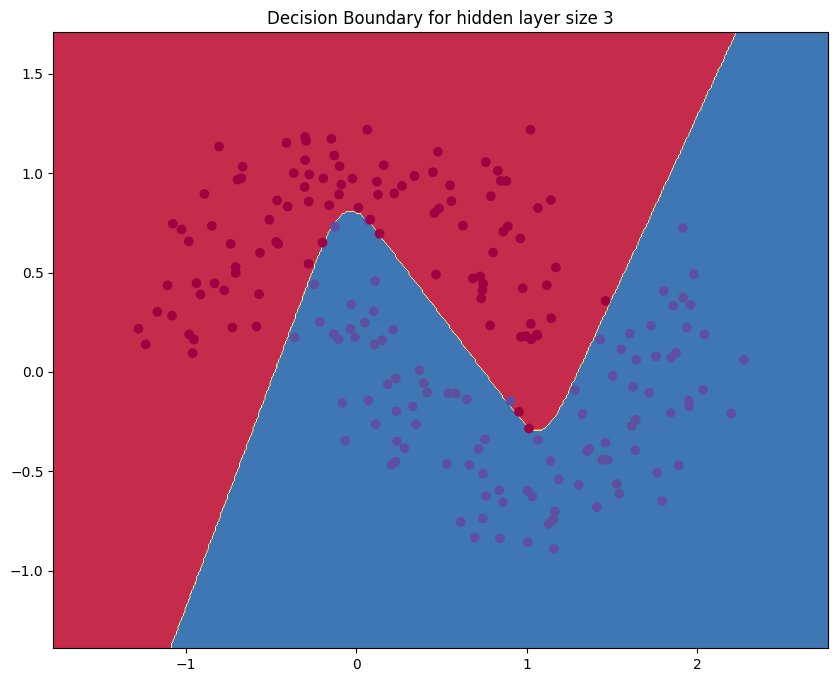

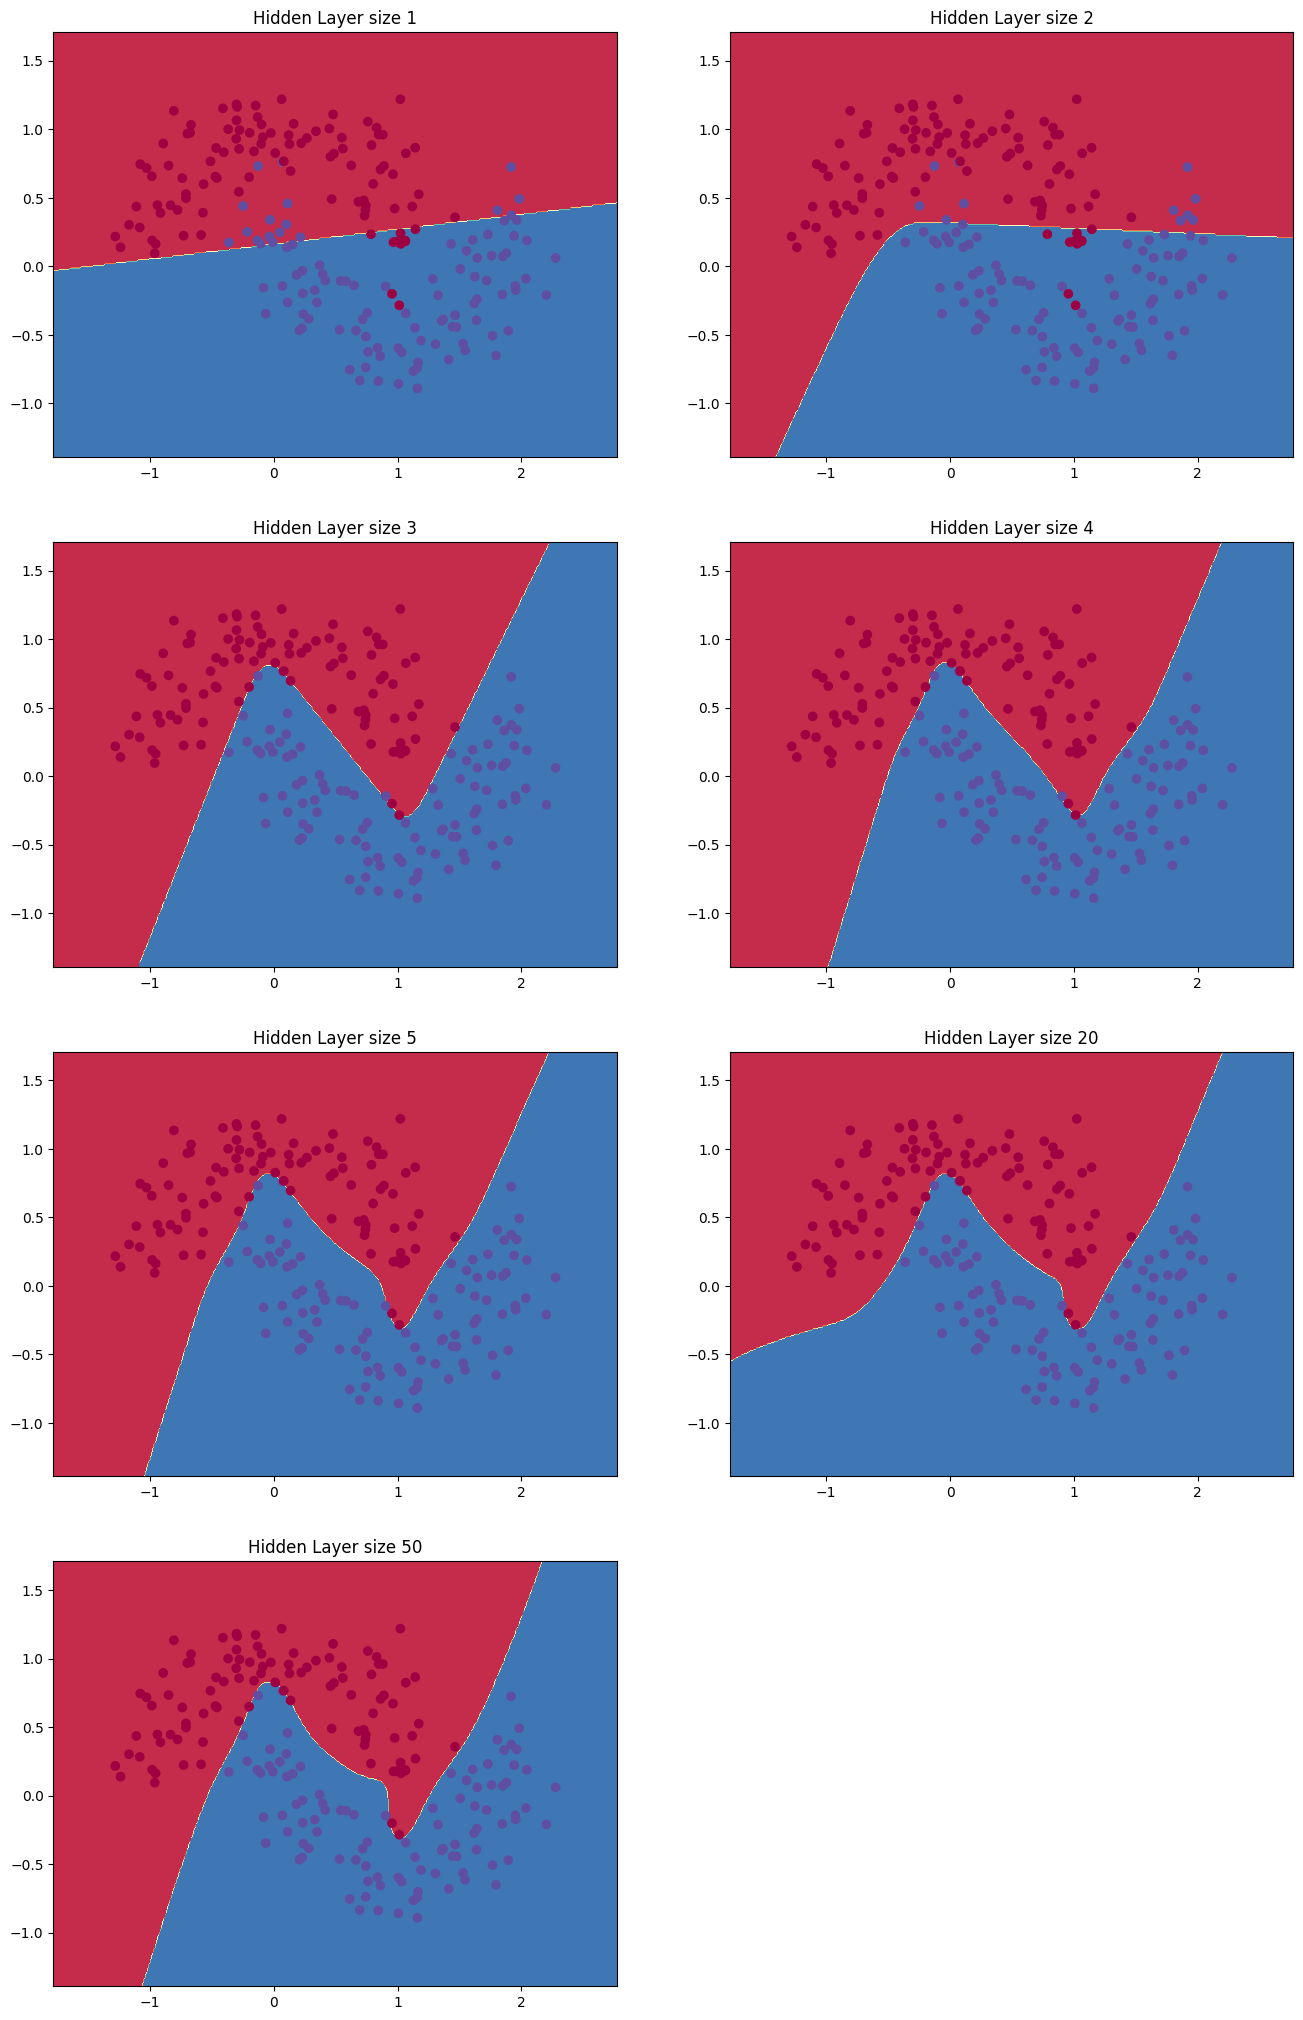

In [ ]:
# 導入所需的函式庫和模組
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# 設定 matplotlib 以嵌入模式顯示圖表，並設定默認圖表大小
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# 設定隨機種子以確保結果可重現
np.random.seed(3)
# 使用 sklearn 的 make_moons 函數生成一個簡單的月亮形數據集
X, y = sklearn.datasets.make_moons(200, noise=0.20)
# 繪製數據集
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# 使用 sklearn 的 LogisticRegressionCV 類來訓練一個邏輯迴歸分類器
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

# 定義一個輔助函數來繪製決策邊界
def plot_decision_boundary(pred_func):
    # 設定 x 和 y 的最小值和最大值並給它們一些邊距
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # 生成一個點網格，其中每個點的距離是 h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 使用模型預測整個網格的類別標籤
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 繪製等高線圖和散點圖
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# 繪製邏輯迴歸分類器的決策邊界
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

# 設定模型和數據集的參數
num_examples = len(X) # 數據集大小
nn_input_dim = 2 # 輸入層維度
nn_output_dim = 2 # 輸出層維度

# 設定梯度下降的參數
epsilon = 0.01 # 學習率
reg_lambda = 0.01 # 正則化強度

# 定義一個函數來計算模型的總損失
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] # 從模型字典中提取出各層的權重和偏差
    # 前向傳播以計算預測結果 ：前向傳播的第一層：線性變換和激活函數
    z1 = X.dot(W1) + b1 # 線性部分（Wx + b）
    a1 = np.tanh(z1) # 激活函數：tan函數
    # 前向傳播的第二層：線性變換
    z2 = a1.dot(W2) + b2
    # 計算每個類別的"未歸一化"概率（指數得分）
    exp_scores = np.exp(z2)
    # 歸一化概率，使其和為1
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 計算對數概率的負值，並提取實際類標籤對應的對數概率
    corect_logprobs = -np.log(probs[range(num_examples), y])
    # 總和所有樣本的對數概率，得到總損失
    data_loss = np.sum(corect_logprobs)
    # 加入正則化項（可選），這有助於防止過度擬合
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    # 回傳平均損失
    return 1./num_examples * data_loss

# 定義一個輔助函數來預測輸出（0或1）
def predict(model, x):
    # 從模型字典中提取各層的權重和偏差
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
      # 前向傳播的第一層：線性變換和激活函數
    z1 = x.dot(W1) + b1 # 線性部分（Wx + b）
    a1 = np.tanh(z1) # 激活函數：雙曲正切函數
      # 前向傳播的第二層：線性變換
    z2 = a1.dot(W2) + b2
    # 計算每個類別的"未歸一化"概率（指數得分）
    exp_scores = np.exp(z2)
    # 歸一化概率，使其和為1
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 取概率最大的類別作為預測結果
    return np.argmax(probs, axis=1)

# 該函數學習神經網絡的參數並返傳到模型。
# - nn_hdim: 隱藏層的節點數量
# - num_passes: 梯度下降訓練數據的遍歷次數
# - print_loss: 如果為 True，則每 1000 次迭代打印損失
# 定義建立模型的函數
'''
模型建立的主要流程如下：

1. 初始化神經網絡的權重和偏差。
2. 使用梯度下降算法進行多次迭代以訓練模型。
3. 在每次迭代中，它都會進行前向傳播以計算預測和損失。
4. 然後進行反向傳播以計算梯度。
5. 更新模型參數。
6. 選擇性地打印出損失以監控訓練過程。
'''
def build_model(nn_hdim, num_passes=20000, print_loss=False):

    # 初始化隨機權重和偏差
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # 初始化模型字典來保存參數
    model = {}

    # 使用梯度下降進行模型訓練
    for i in range(0, num_passes):

        # 前向傳播
        z1 = X.dot(W1) + b1 # 這一行計算隱藏層的輸入。X.dot(W1) 是輸入資料和第一層權重的點積，+ b1 添加了偏差項。
        a1 = np.tanh(z1) # 在這裡，我們對 z1 應用啟動函數（這裡是雙曲正切函數）來得到隱藏層的輸出。
        z2 = a1.dot(W2) + b2 # 這一行計算輸出層的輸入。它是隱藏層輸出 a1 和第二層權重 W2 的點積，再加上偏差 b2。
        exp_scores = np.exp(z2) #這一行計算softmax函數的指數部分。它對每個輸出層輸入應用指數函數。
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) #這裡計算了最終的機率（或者說，softmax輸出）。每個指數得分除以所有得分的和。

        # 反向傳播
        delta3 = probs # 這一行初始化輸出層的梯度為輸出層的輸出（即機率）。
        delta3[range(num_examples), y] -= 1 # 這一行從正確類別的梯度中減去 1，這是計算交叉熵損失梯度的一部分。
        dW2 = (a1.T).dot(delta3) # 這一行計算了對 W2 的梯度。它是隱藏層輸出（a1 的轉置）和輸出層梯度（delta3）的點積。
        db2 = np.sum(delta3, axis=0, keepdims=True) # 這一行計算了對 b2 的梯度，它是輸出層梯度（delta3）的和。
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))  # 這一行計算了隱藏層的梯度。它是輸出層梯度（delta3）和 W2 的點積，乘以隱藏層輸出（a1）的導數
        dW1 = np.dot(X.T, delta2) # 這一行計算了對 W1 的梯度。它是輸入（X 的轉置）和隱藏層梯度（delta2）的點積。
        db1 = np.sum(delta2, axis=0) # 這一行計算了對 b1 的梯度，它是隱藏層梯度（delta2）的和。

        # # 添加正則化項(b1 和 b2 沒有正則化項)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # 更新權重和偏差
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

        # 將新的參數保存到模型中
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # O選擇性地打印損失
        # 這是很花時間的，因為它使用整個數據集，所以我們不想太頻繁地這樣做。
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))

    return model

# 建立三維隱藏層的模型
model = build_model(3, print_loss=True)

# 函數來繪製決策邊界
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

# 不同隱藏層尺寸的比較
plt.figure(figsize=(16, 32))
# 定義一個列表，其中包含我們想要試驗的不同隱藏層尺寸。
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
# 對列表 hidden_layer_dimensions 進行迭代，每次迭代都會獲取一個不同的隱藏層尺寸（nn_hdim）。
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1) # 在5x2的子圖格局中創建一個新的子圖。
    plt.title('Hidden Layer size %d' % nn_hdim) # 為當前的子圖設置標題，顯示隱藏層的大小。
    model = build_model(nn_hdim) # 使用當前的 nn_hdim（隱藏層尺寸）來建立一個新的模型。
    plot_decision_boundary(lambda x: predict(model, x)) # 繪製該模型的決策邊界。
plt.show()# 顯示所有子圖。

## 5.Heart Disease Prediction

這是我在網路上面發現的一個蠻實用的應用，算是一可應用在實際生活中的Kaggle應用吧？

下棉主要的程式碼主要來自 [Heart-disease-prediction-project-on-Machine-Learning](https://github.com/Remyaramani9/Heart-disease-prediction-project-on-Machine-Learning-/tree/main)
，我這邊主要做了些優化跟註解。



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
url = 'https://github.com/markl-a/ML-demos/raw/main/0.ANN/heart.csv'  # 注意這裡是 'raw' 鏈接
response = requests.get(url)

# 確保請求成功
if response.status_code == 200:
    with open('heart.csv', 'wb') as f:
        f.write(response.content)
else:
    print('Failed to download the file.')

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("heart.csv")

type(dataset)

dataset.shape

['.config', 'heart.csv', '.ipynb_checkpoints', 'wandb', 'model.h5', 'sample_data']


(303, 14)

在Pandas中，DataFrame.describe()函數用於生成描述性統計資訊，這些資訊總結了DataFrame中數值型（預設情況下）列的中心趨勢、分散情況和形狀。它主要用於在數據探索（Exploratory Data Analysis，EDA）階段對數據集進行快速分析。

這個函數會返回以下統計量：

*   count：非NA/null觀測值的數量。
*   mean：平均值。
*   std：標準差。
*   min：最小值。
*   25%：第一四分位數（25th百分位數）。
*   50%：中位數（第二四分位數或50th百分位數）。
*   75%：第三四分位數（75th百分位數）。
*   max：最大值。



In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split #導入了 train_test_split 函數，用於將資料集分割成訓練集和測試集。

predictors = dataset.drop("target",axis=1)
#這一行從原始資料集（dataset）中移除名為 "target" 的欄位，並將剩餘的資料存儲到一個新變數 predictors 中。這通常是特徵（features）的集合，用於預測目標（target）變數
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
'''
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0): 這一行使用 train_test_split 函數將資料分割成訓練集（X_train, Y_train）和測試集（X_test, Y_test）。
predictors 和 target 是我們要分割的特徵和目標變數。
test_size=0.20 表示測試集會包含原始資料的 20%，而剩餘的 80% 將用作訓練集。
random_state=0 確保分割是可重現的，這樣每次執行時，你都會得到相同的訓練和測試集。
'''

In [ ]:
X_train.shape # 回傳 行,列

(242, 13)

In [ ]:
X_test.shape  # 回傳 行,列

(61, 13)

In [ ]:
Y_train.shape  # 回傳 行,列

(242,)

In [ ]:
Y_test.shape  # 回傳 行,列

(61,)

### Model Fitting (Traininng)

In [ ]:
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [ ]:
# 這邊感覺就不用註解了，就看字面意思就可以了
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


#### SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


#### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


#### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


#### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 11.5139 - accuracy: 0.4380
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 10.5279 - accuracy: 0.4050
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 9.7136 - accuracy: 0.3967
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 8.9314 - accuracy: 0.4008
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 7.9153 - accuracy: 0.3926
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 6.6385 - accuracy: 0.3967
Epoch 7/300
8/8 [==============================] - 0s 5ms/step - loss: 5.1558 - accuracy: 0.4174
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 4.1157 - accuracy: 0.5124
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 3.1719 - accuracy: 0.5331
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 2.5685 - accuracy: 0.4752
Epoch 11/300
8/8 [=========

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 80.33 %


#### Output final score

In [ ]:
import seaborn as sns
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")



The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 80.33 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

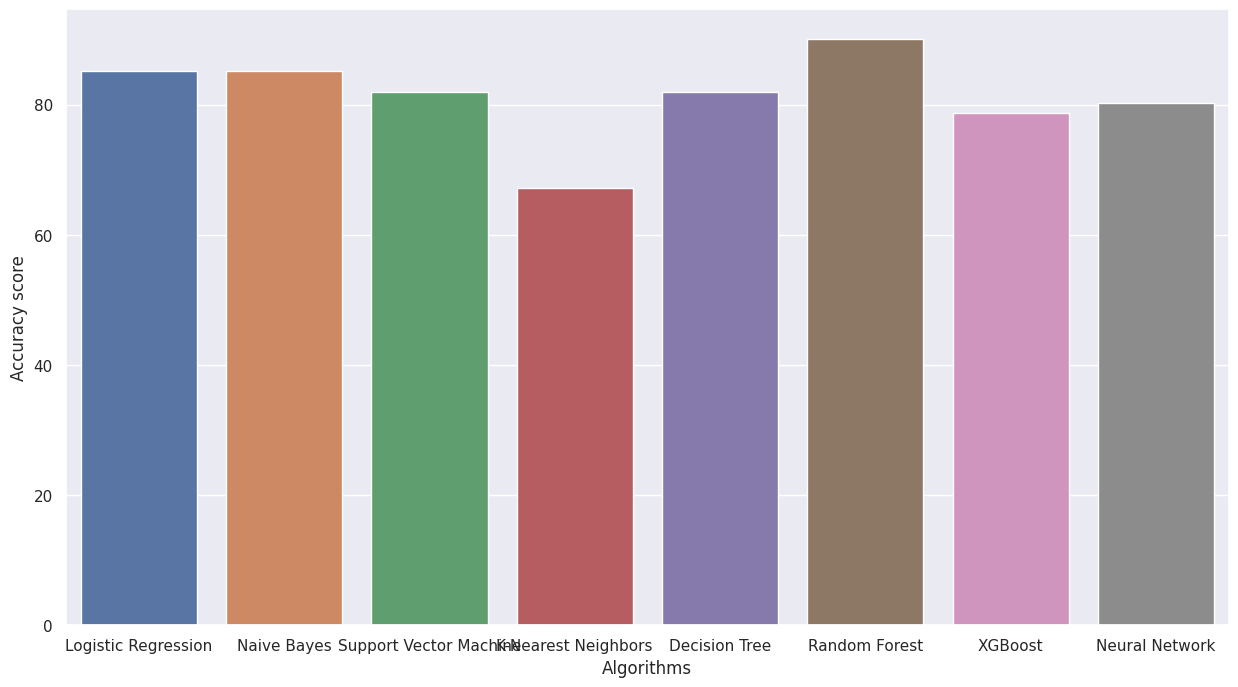

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)